In [2]:
DPI = 600
FIGSIZE=(15, 4)

In [3]:
import matplotlib.pyplot as plt
import json

def plot_func(name, y_height):
    file = open("reports/{}.json".format(name), "r")
    data = json.loads(file.read())
    
    plt.figure(figsize=FIGSIZE, dpi=DPI)
    plt.title(name)
    
    WIDTH=1.5
    if (y_height > 5000):
        WIDTH = 10
    
    plt.bar([i for i in range (data["n buckets"])], data["chain lengths"], width=WIDTH)
    
    plt.xlim([-20, data["n buckets"]])
    plt.ylim([0, y_height])
    plt.ylabel("Длина цепочки")
    
    plt.savefig("images/{}.png".format(name))

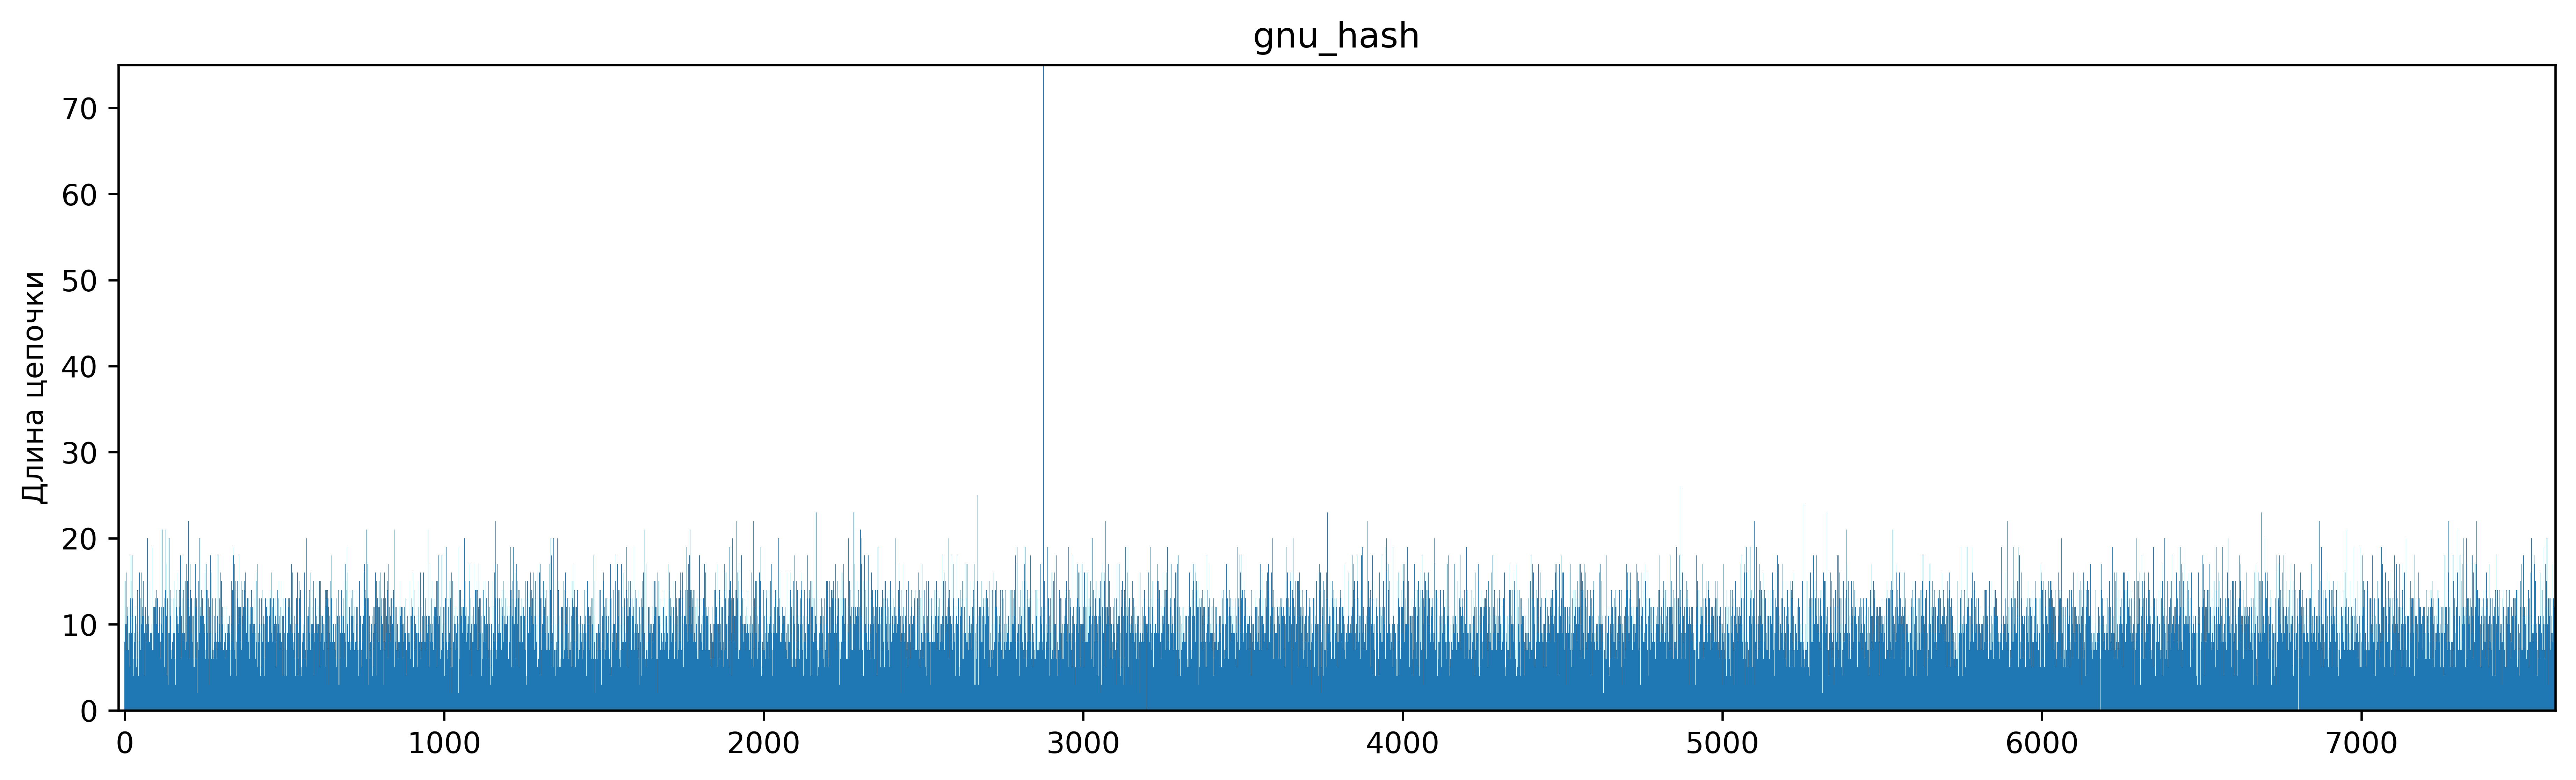

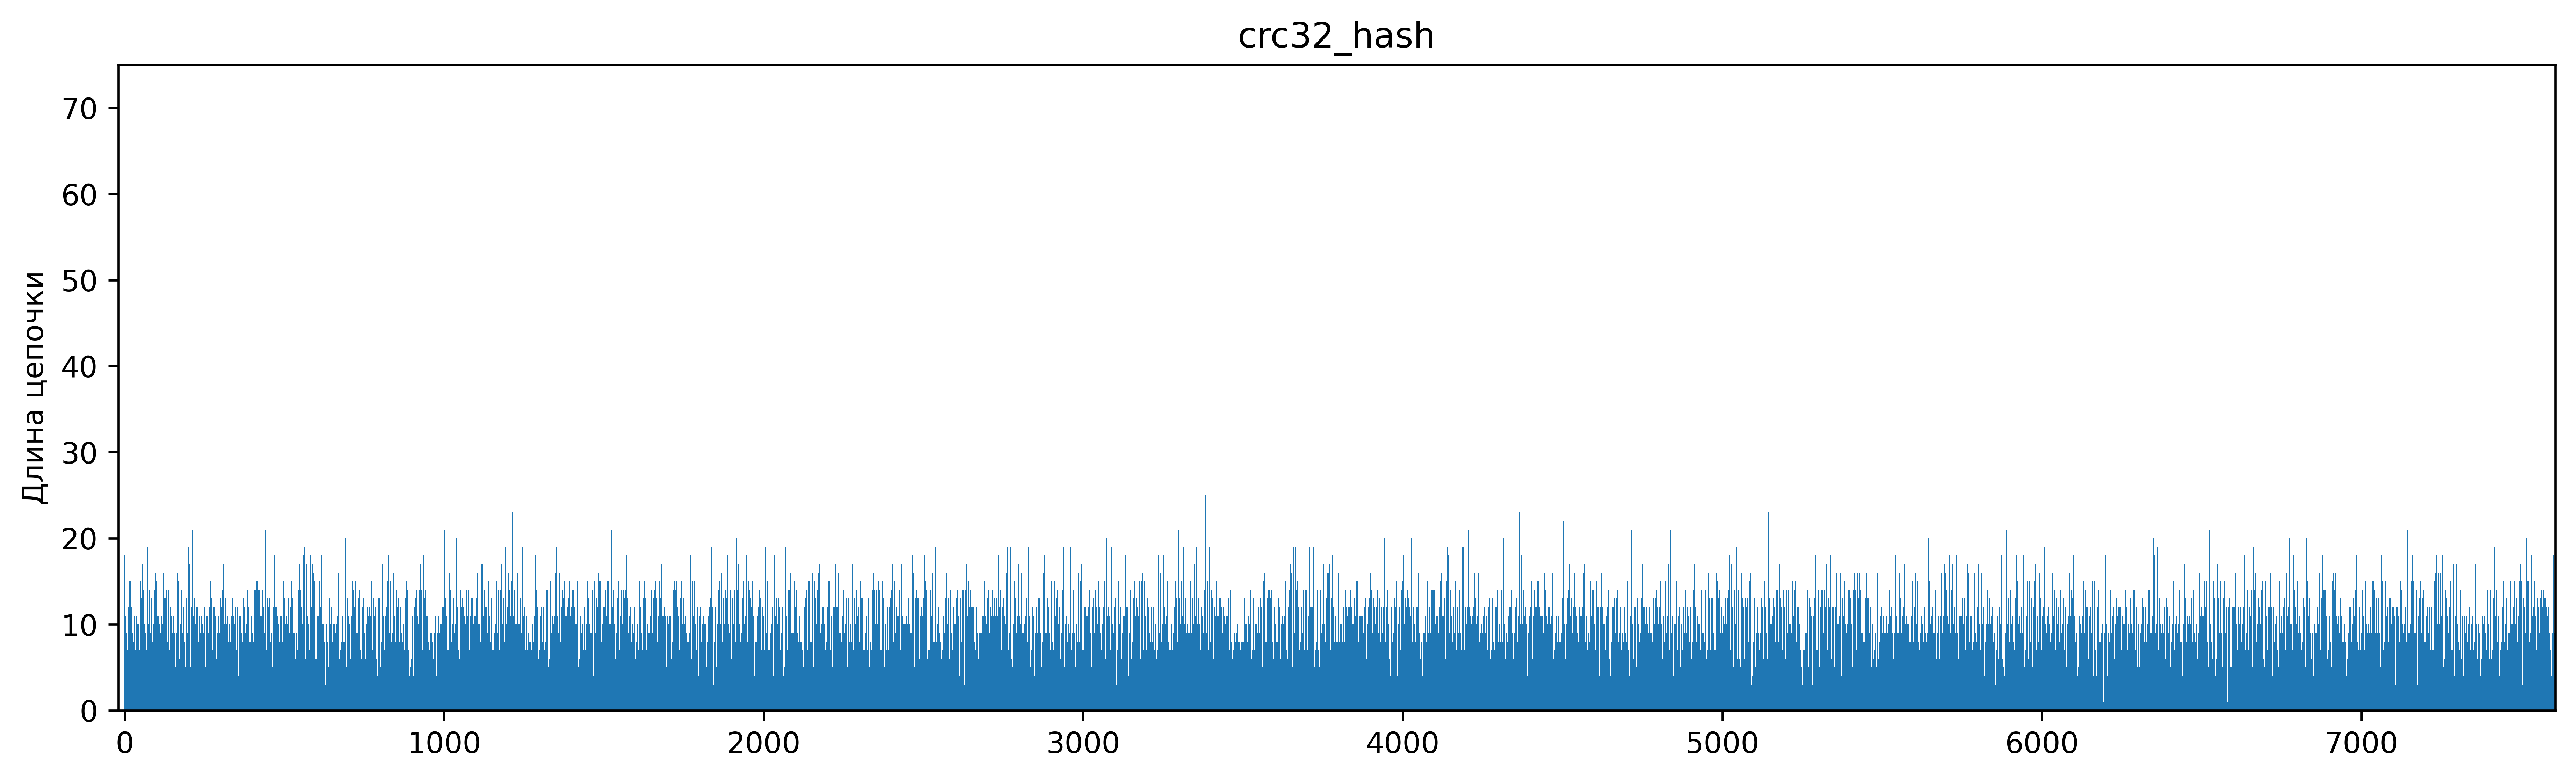

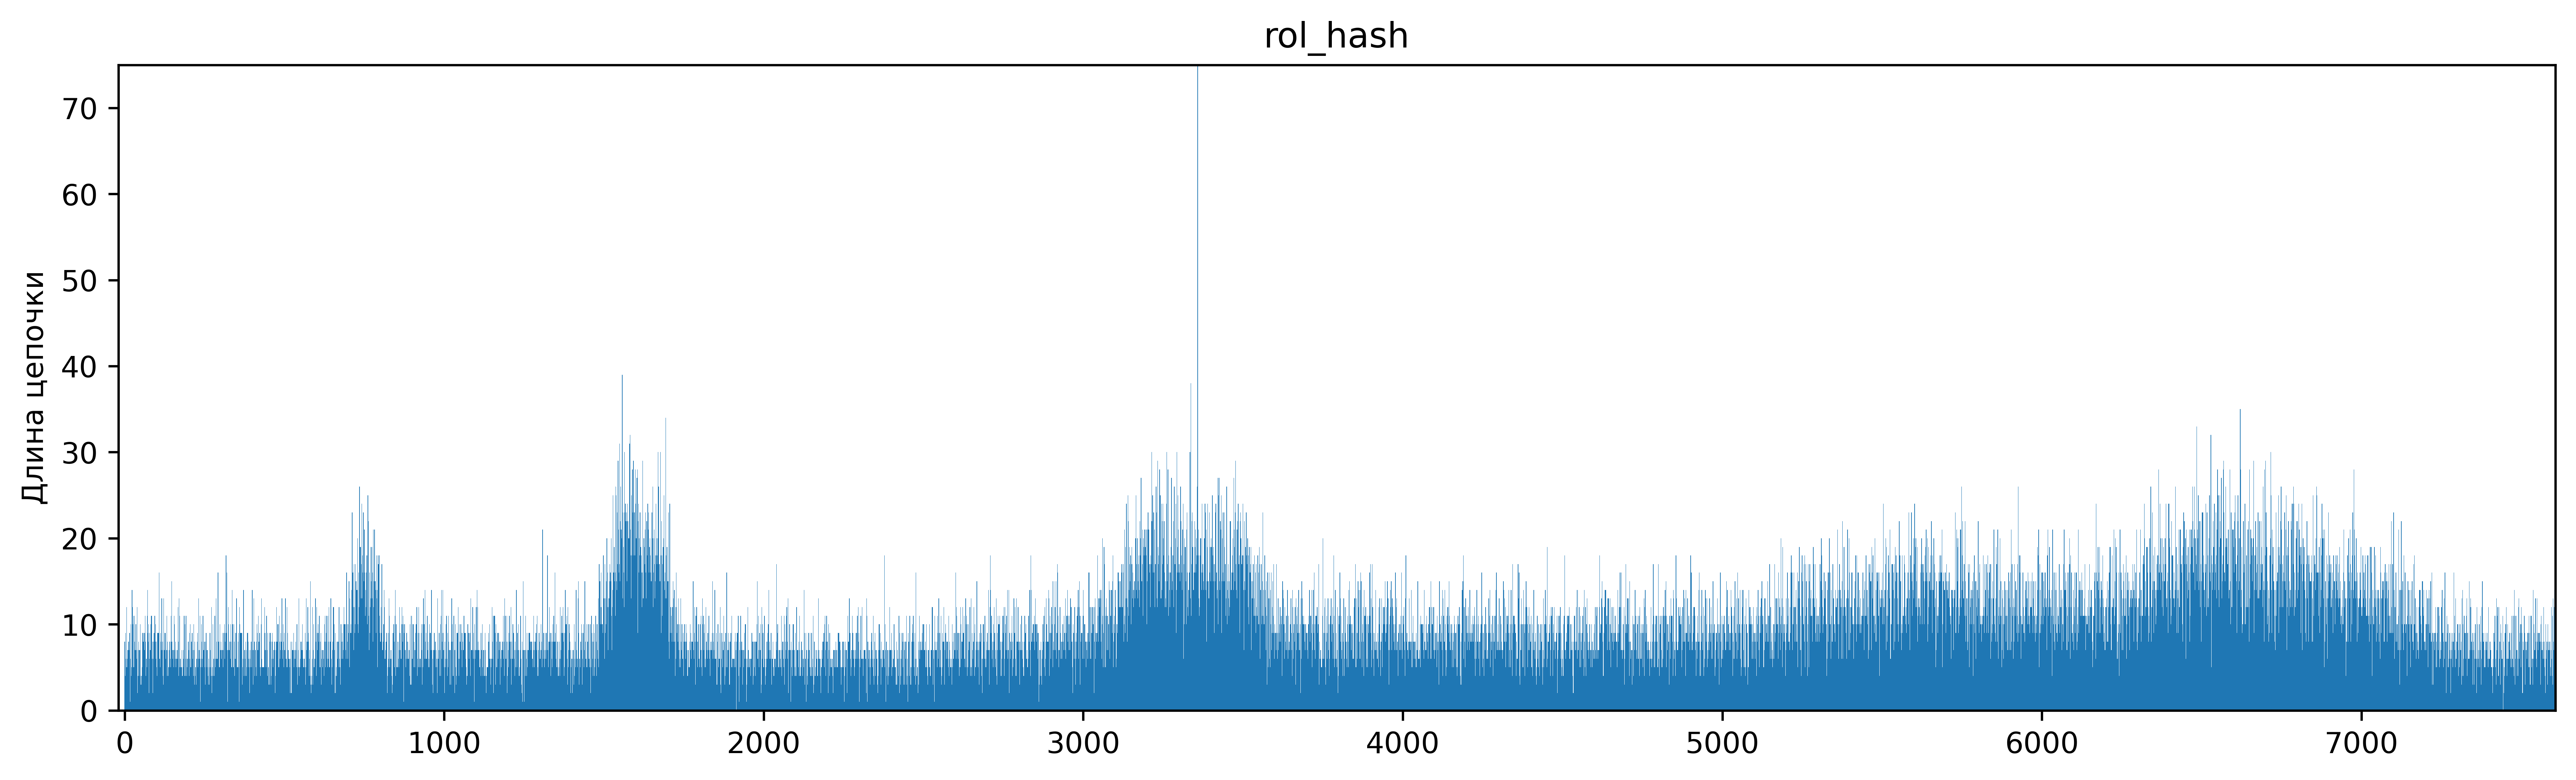

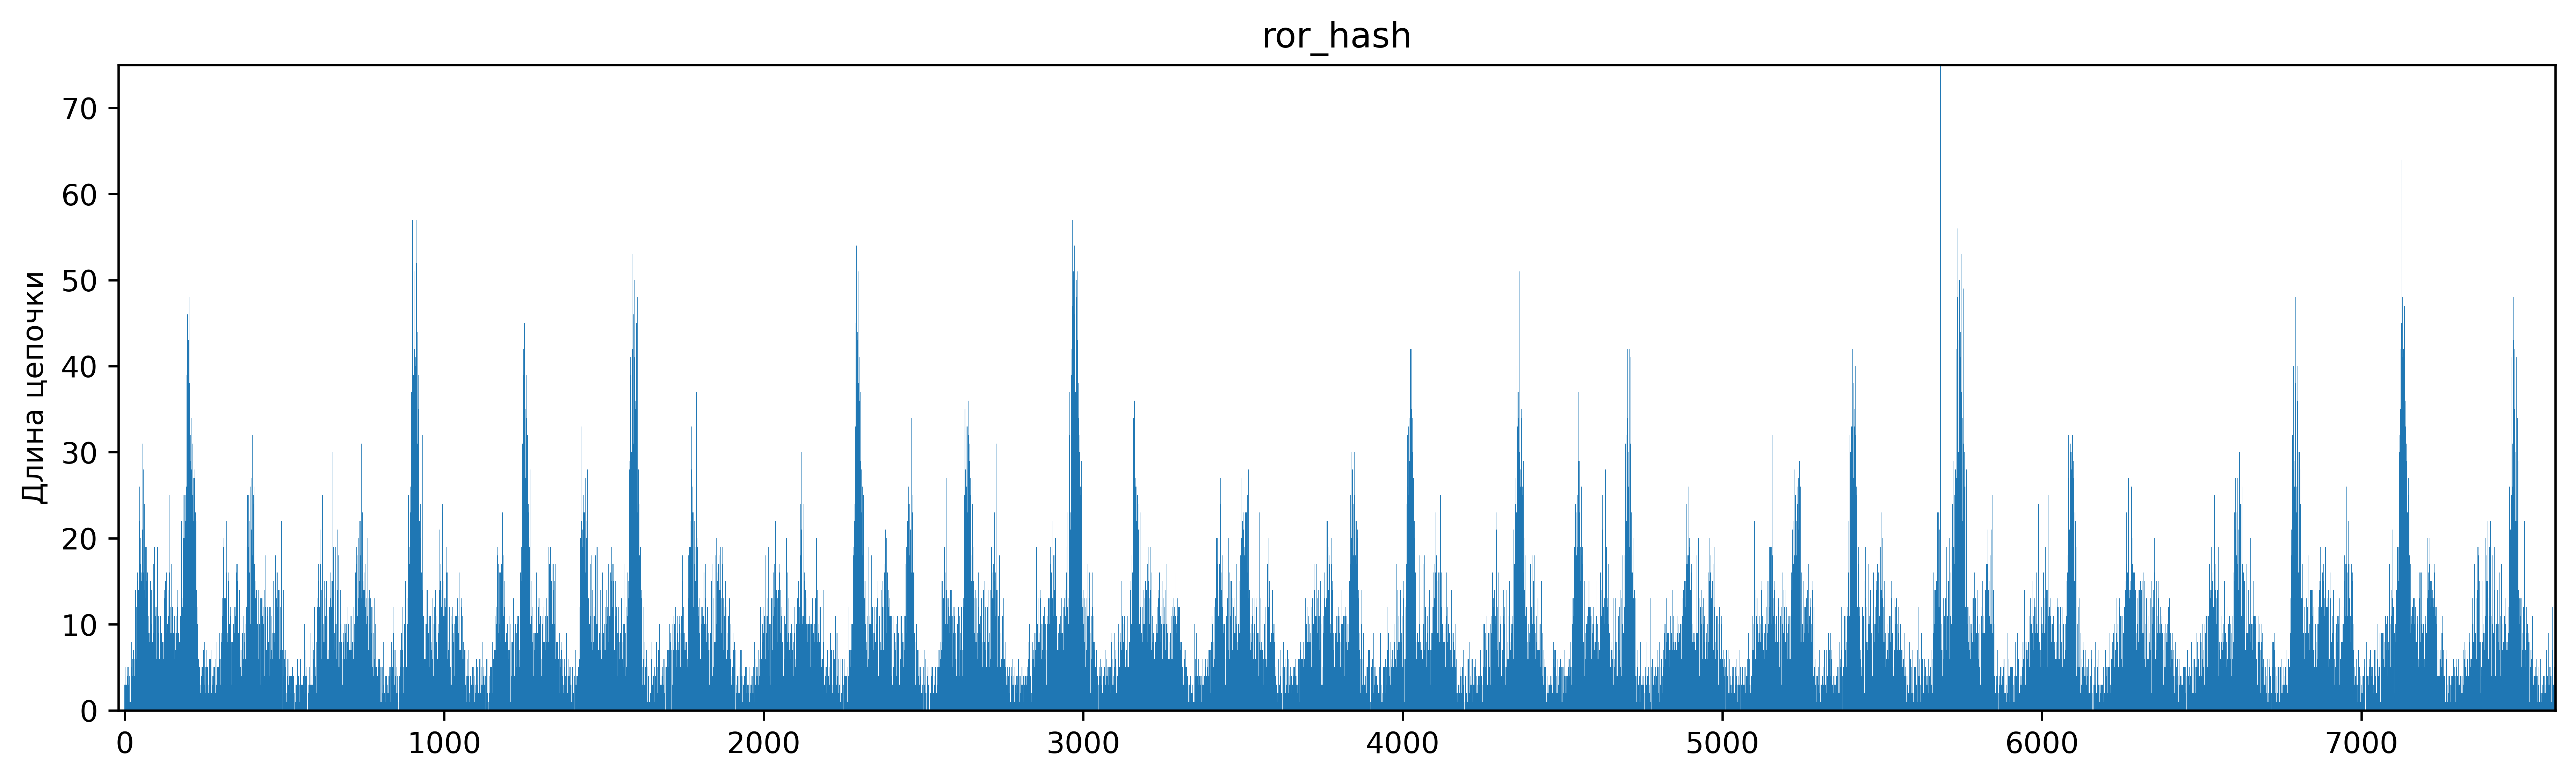

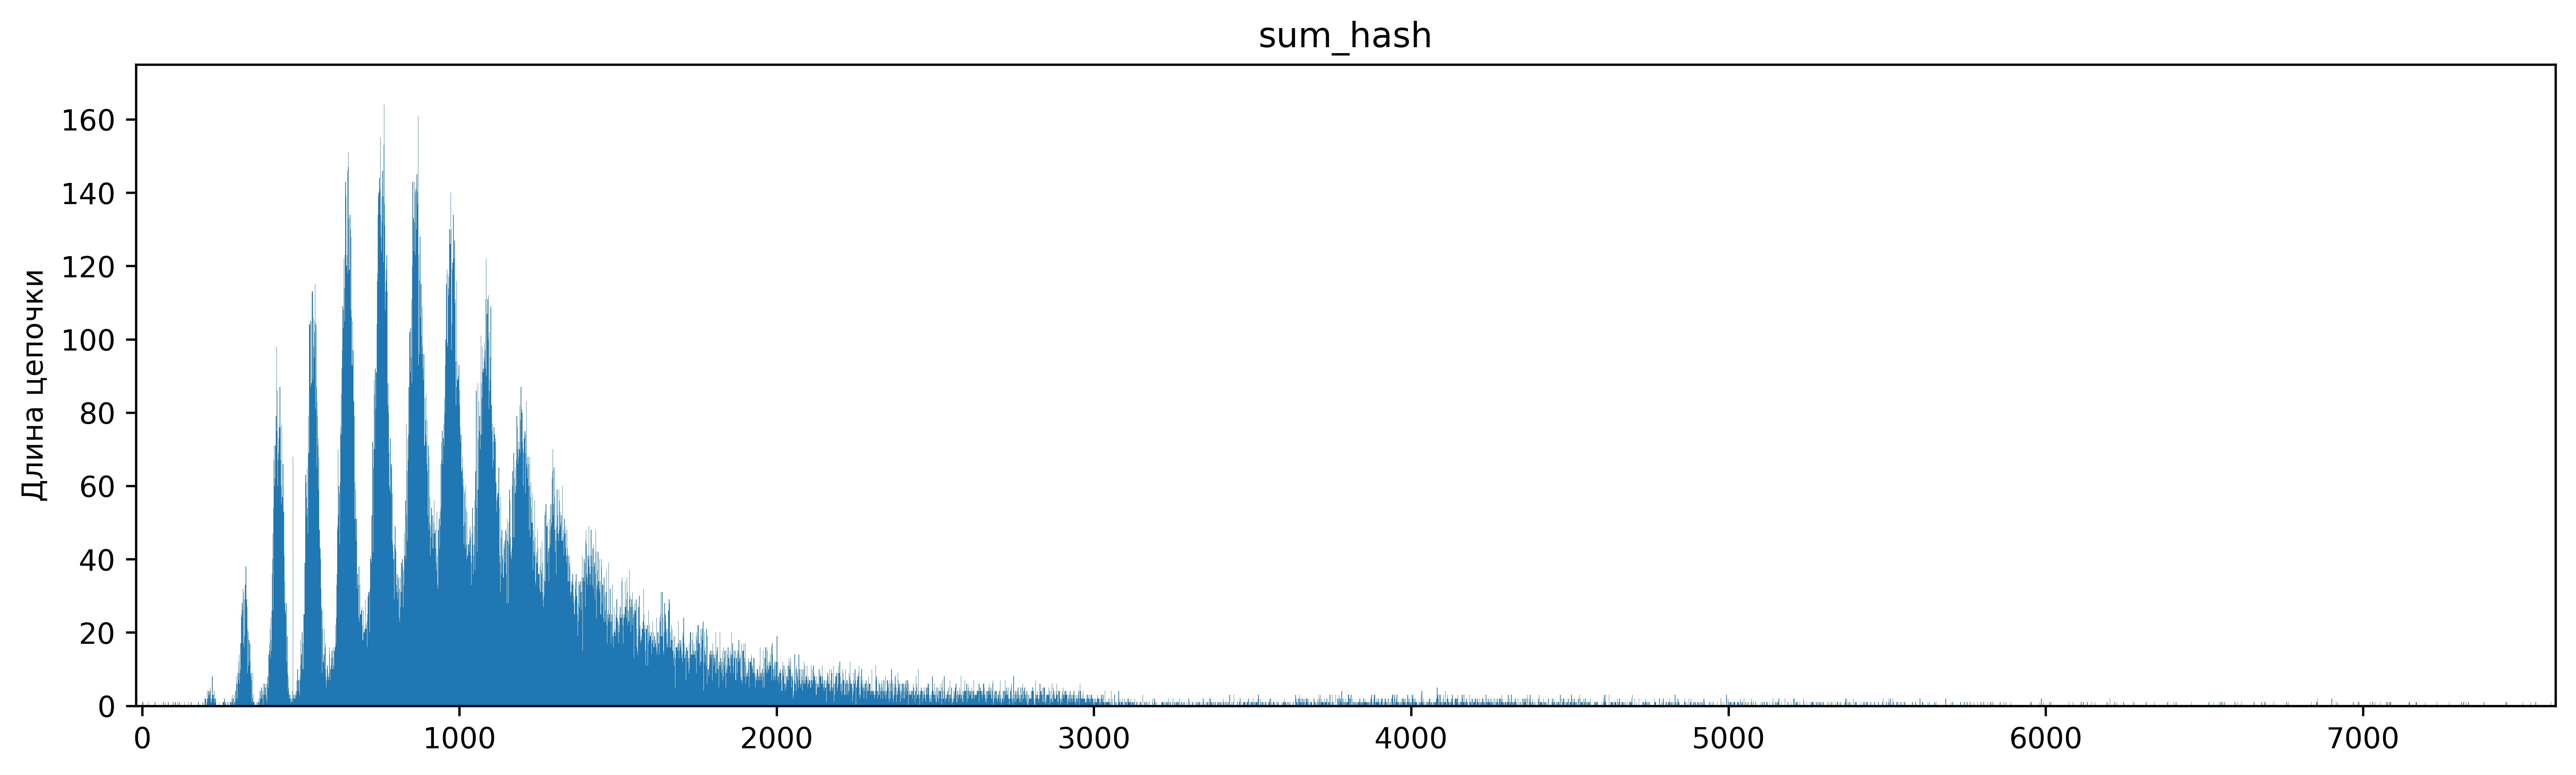

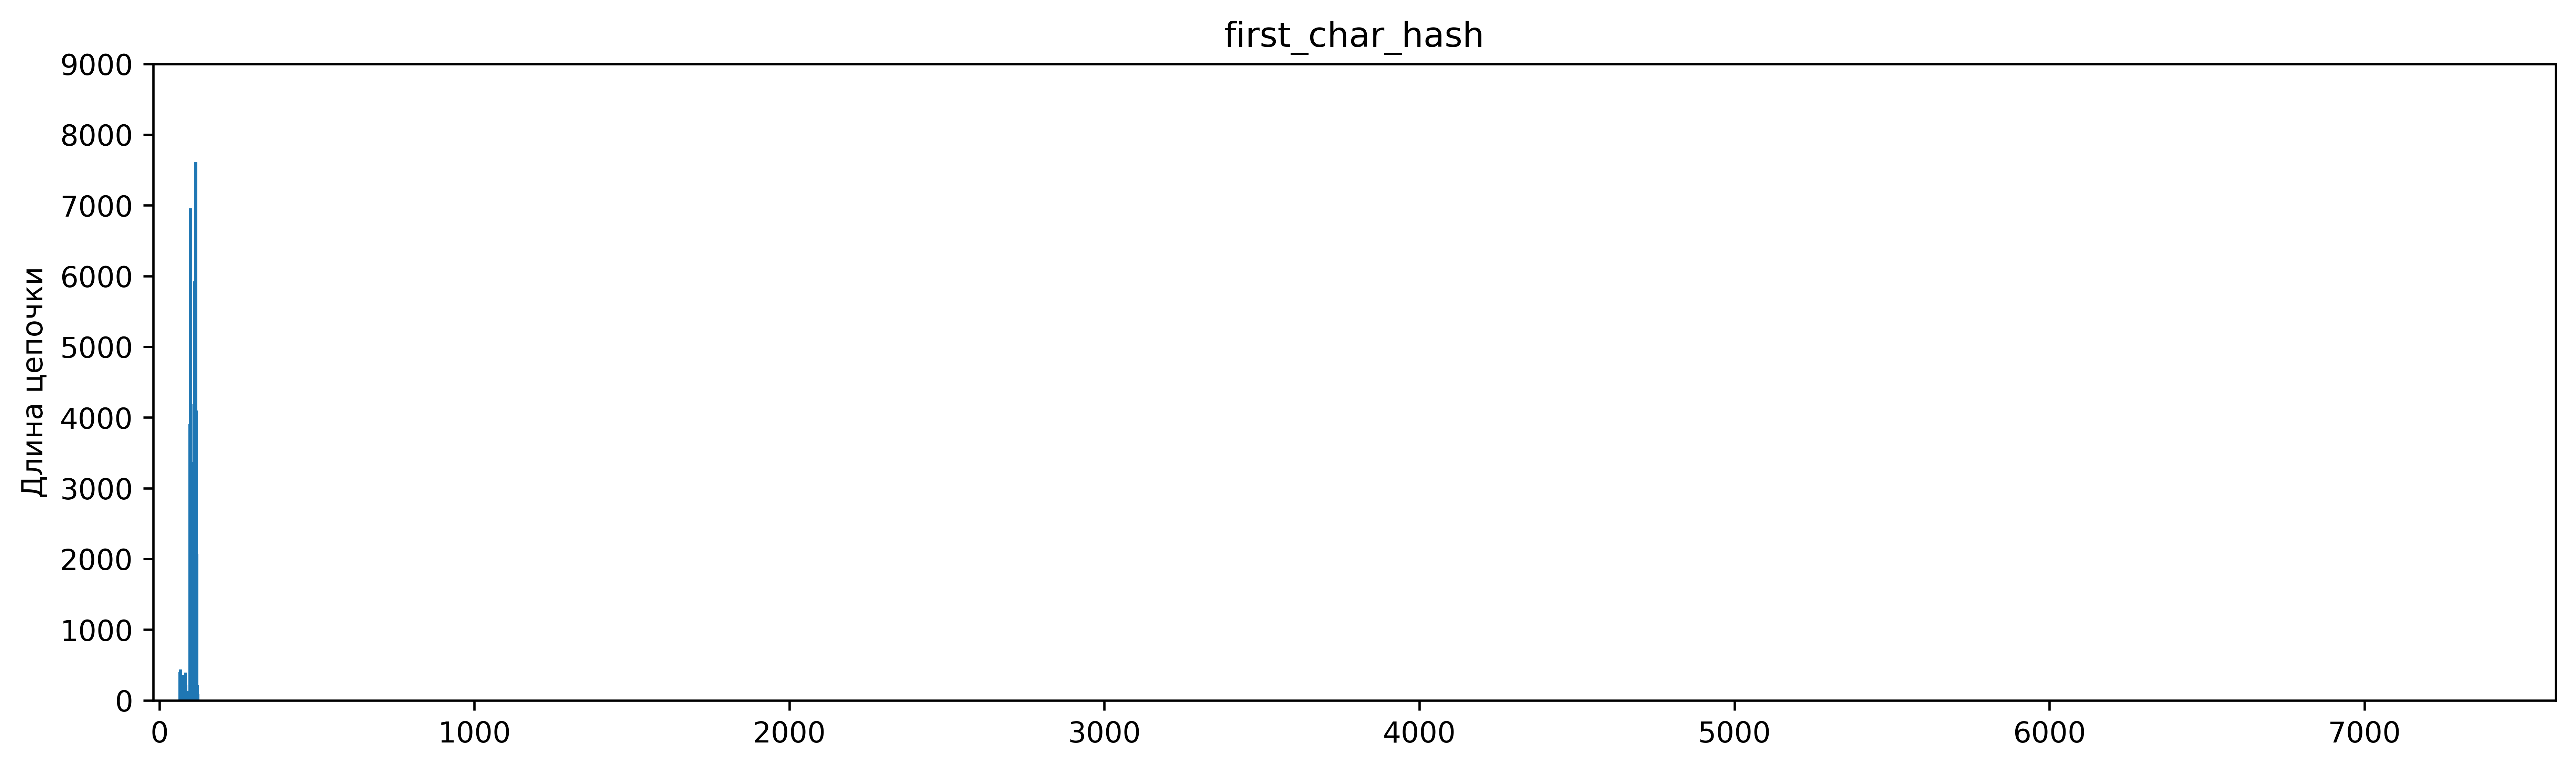

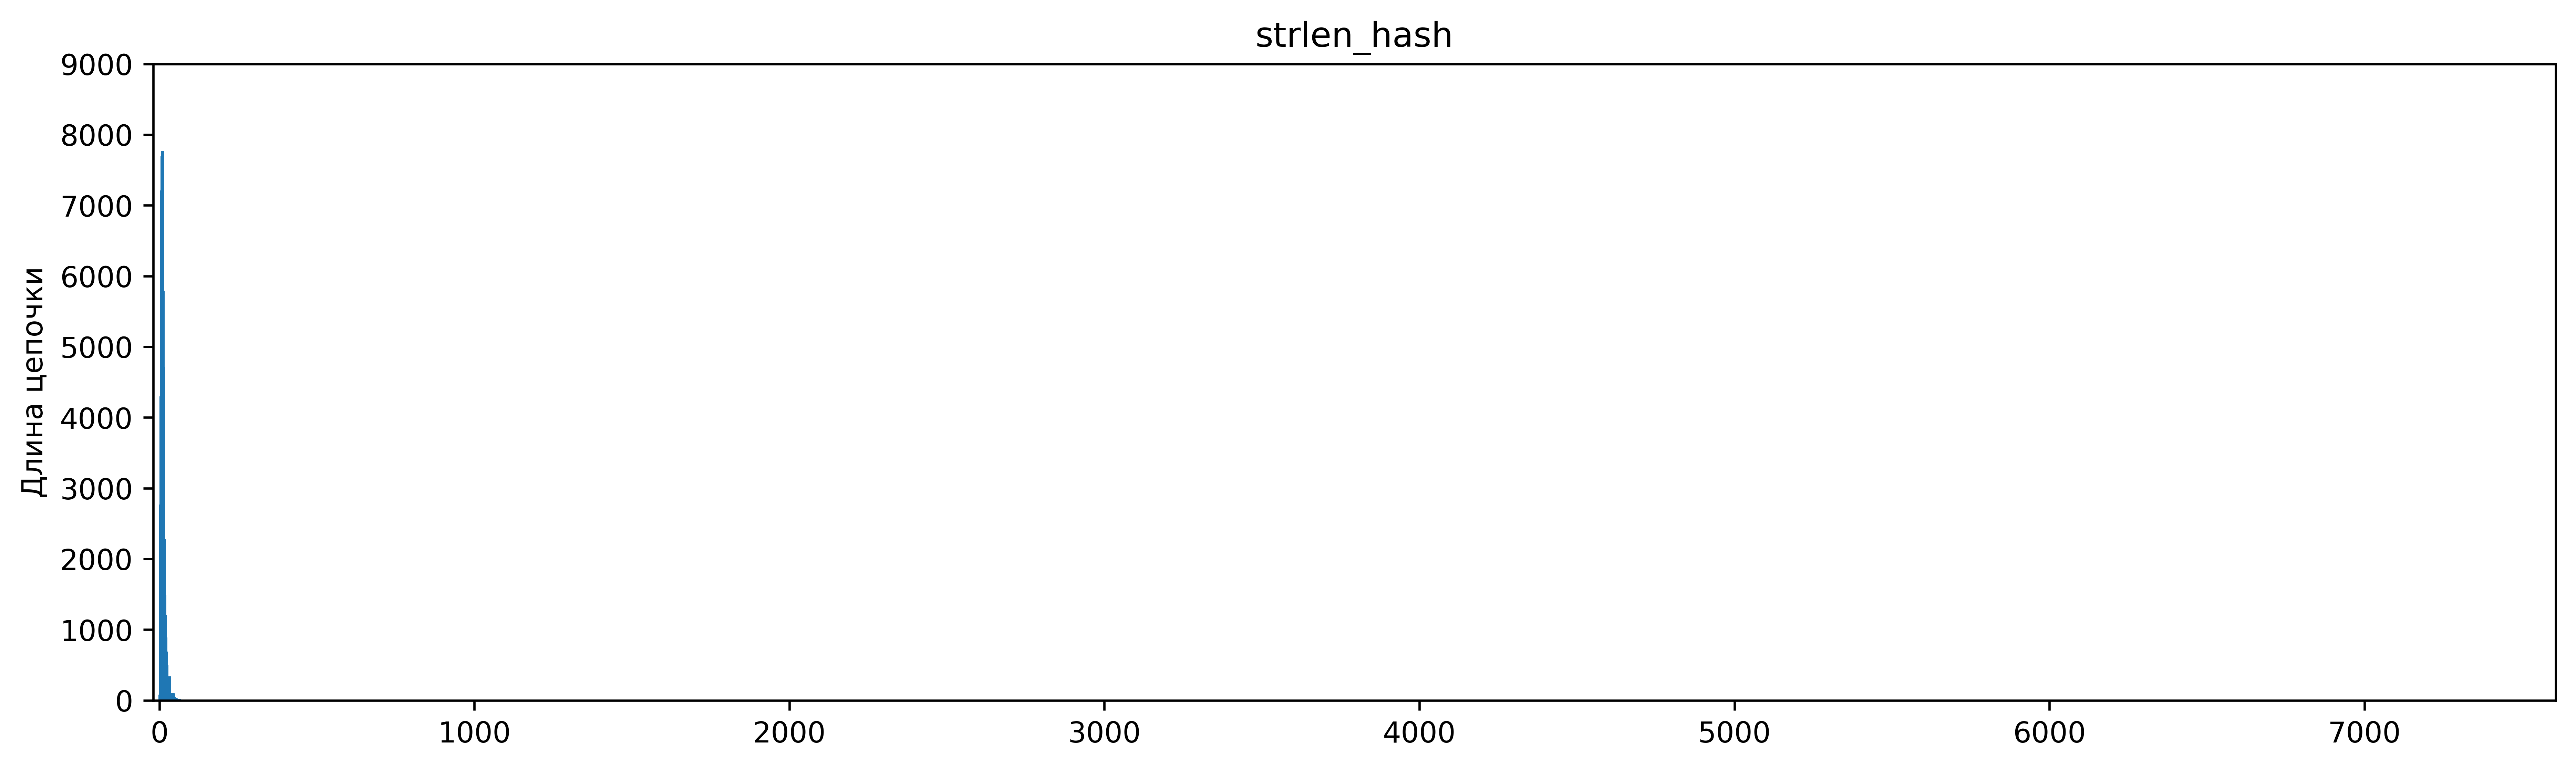

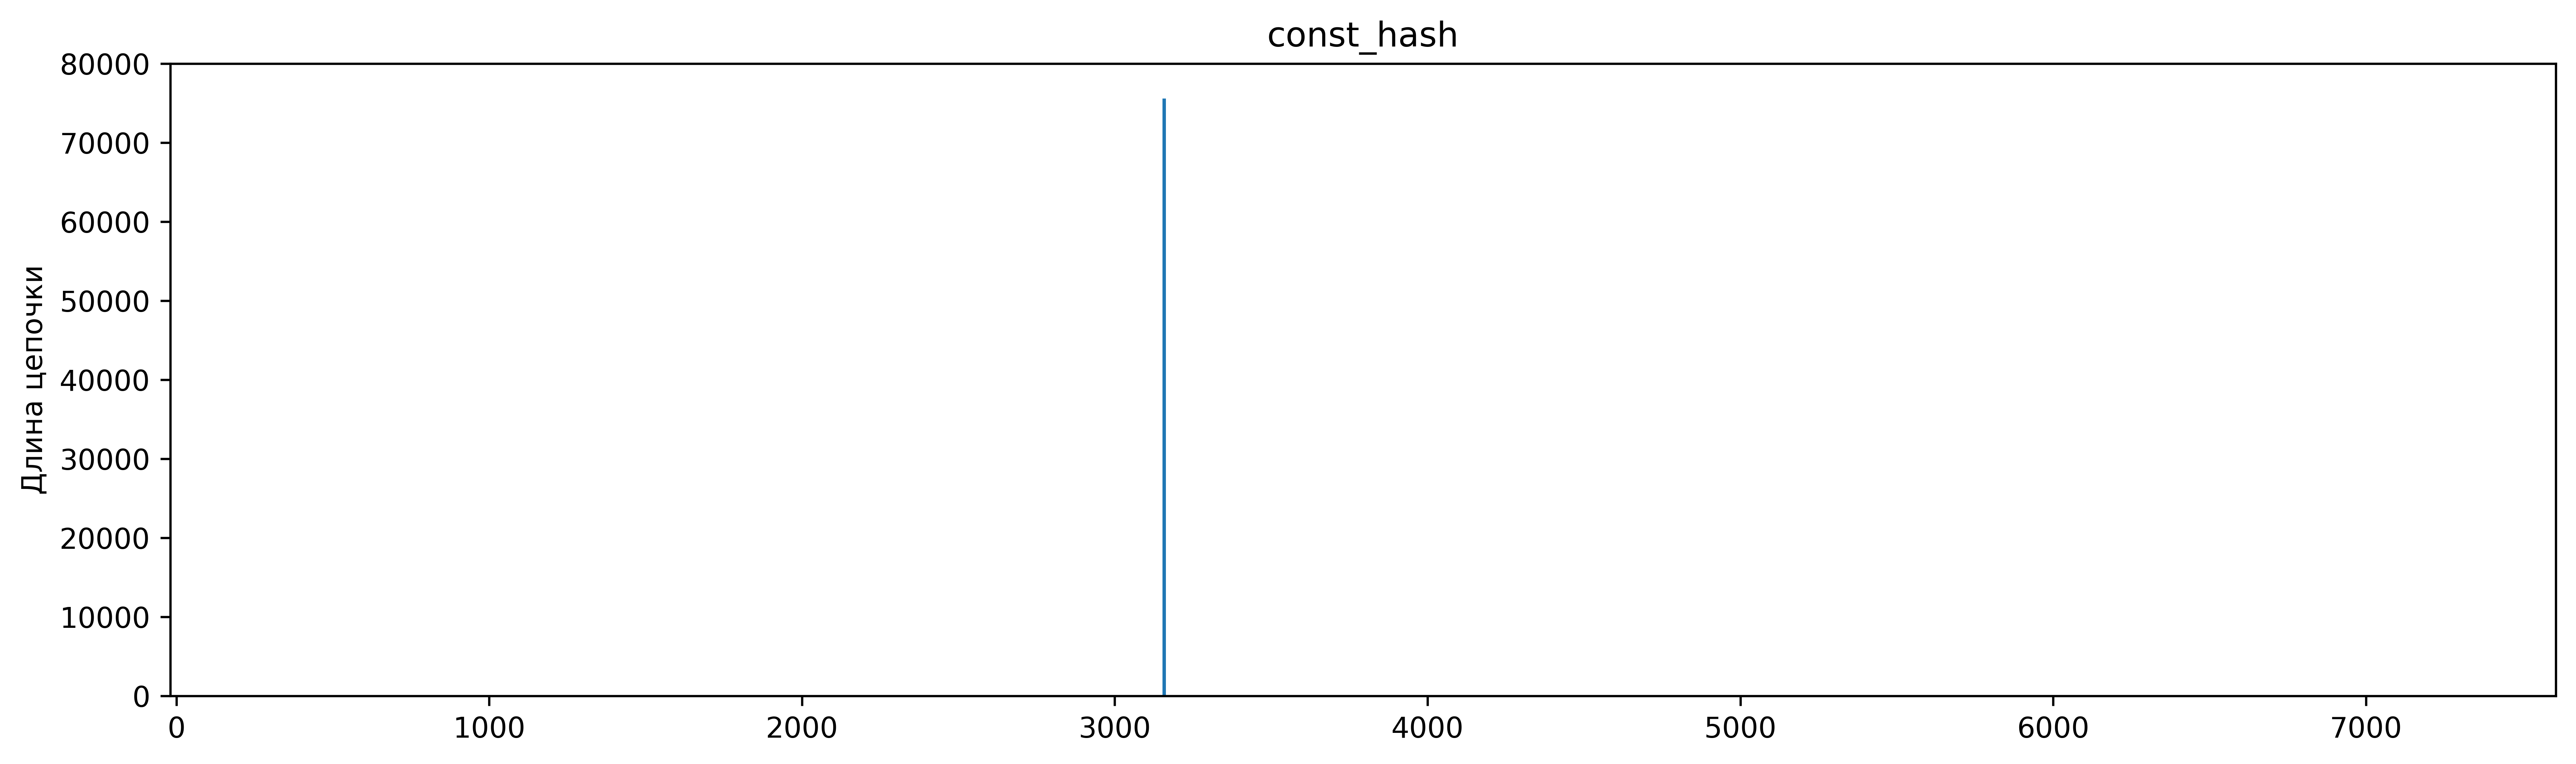

In [4]:
plot_func("gnu_hash", 75)
plot_func("crc32_hash", 75)
plot_func("rol_hash", 75)
plot_func("ror_hash", 75)
plot_func("sum_hash", 175)

plot_func("first_char_hash", 9000)

plot_func("strlen_hash", 9000)
plot_func("const_hash", 80000)

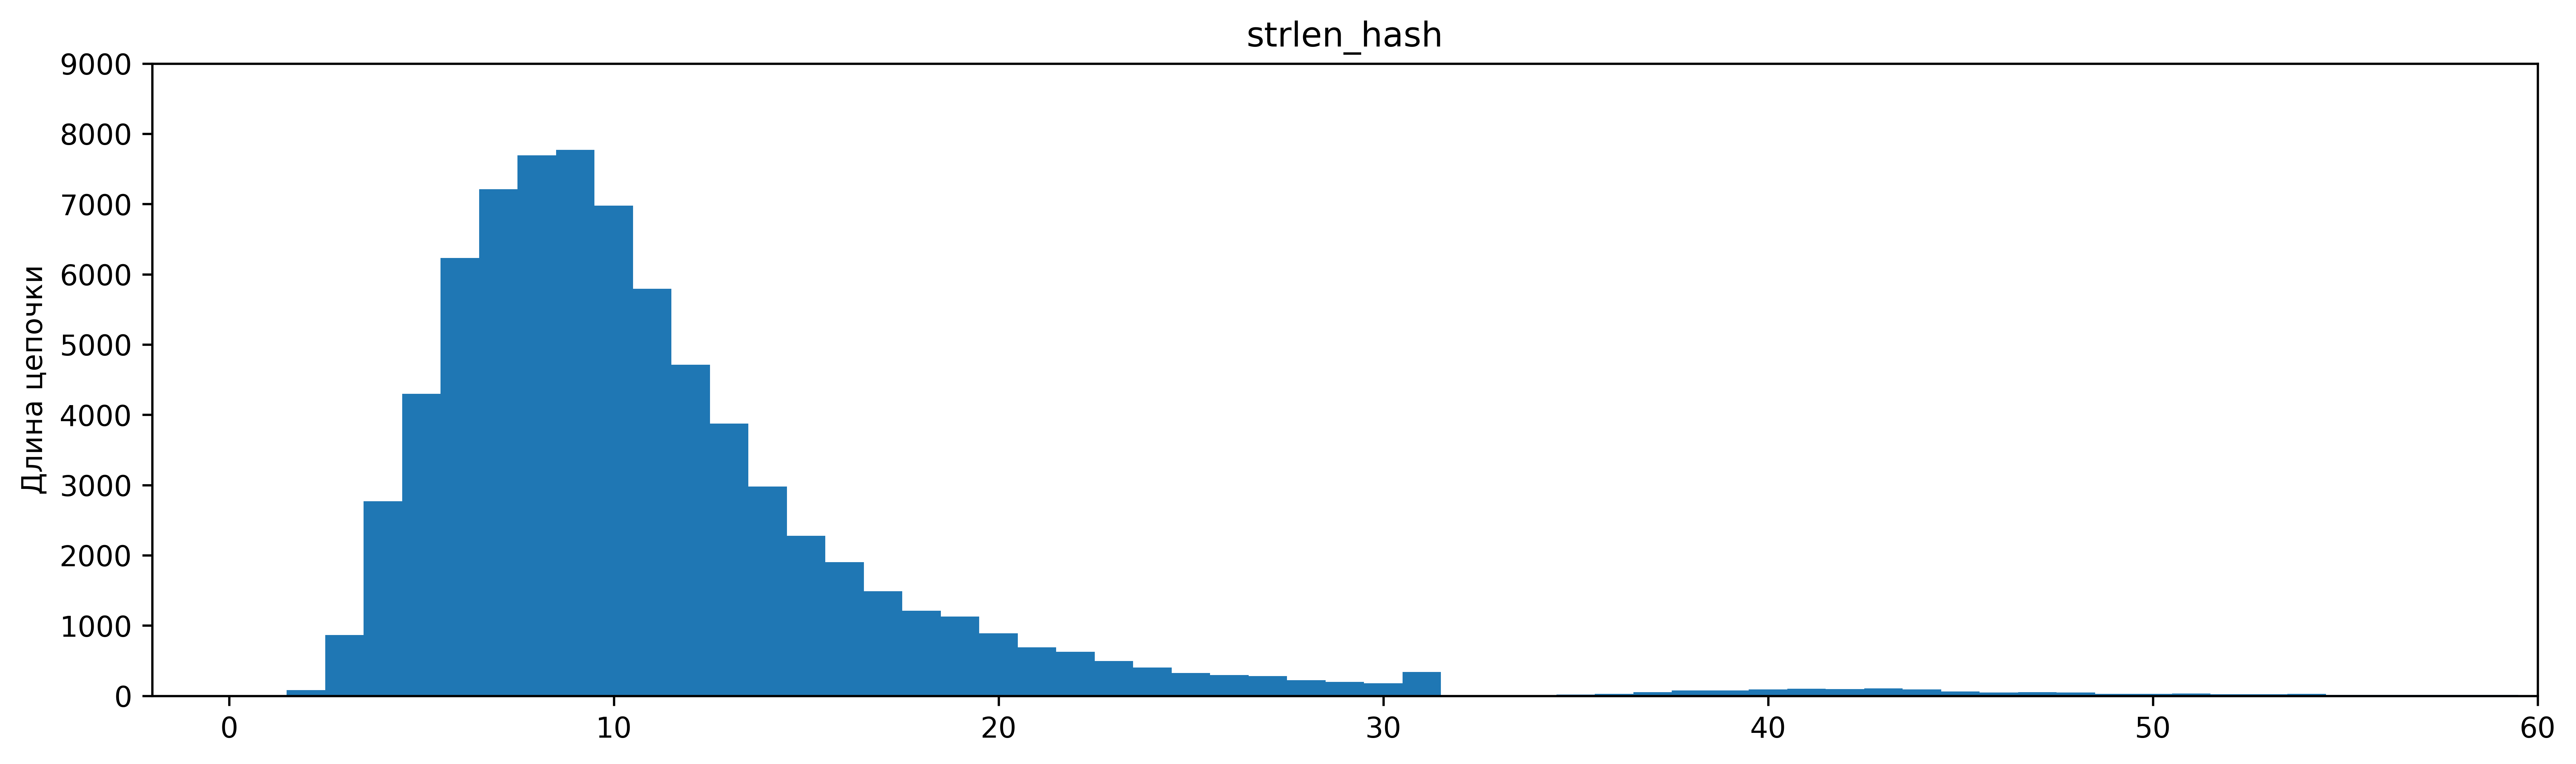

In [5]:
# Более детализированно

def plot_strlen():
    name = "strlen_hash"
    y_height = 9000
    
    file = open("reports/{}.json".format(name), "r")
    data = json.loads(file.read())
    
    plt.figure(figsize=FIGSIZE, dpi=DPI)
    plt.title(name)
    
    WIDTH=1
    
    plt.bar([i for i in range (data["n buckets"])], data["chain lengths"], width=WIDTH)
    
    plt.xlim([-2, 60])
    plt.ylim([0, y_height])
    plt.ylabel("Длина цепочки")
    
    plt.savefig("images/{}_detailed.png".format(name))
    
plot_strlen()

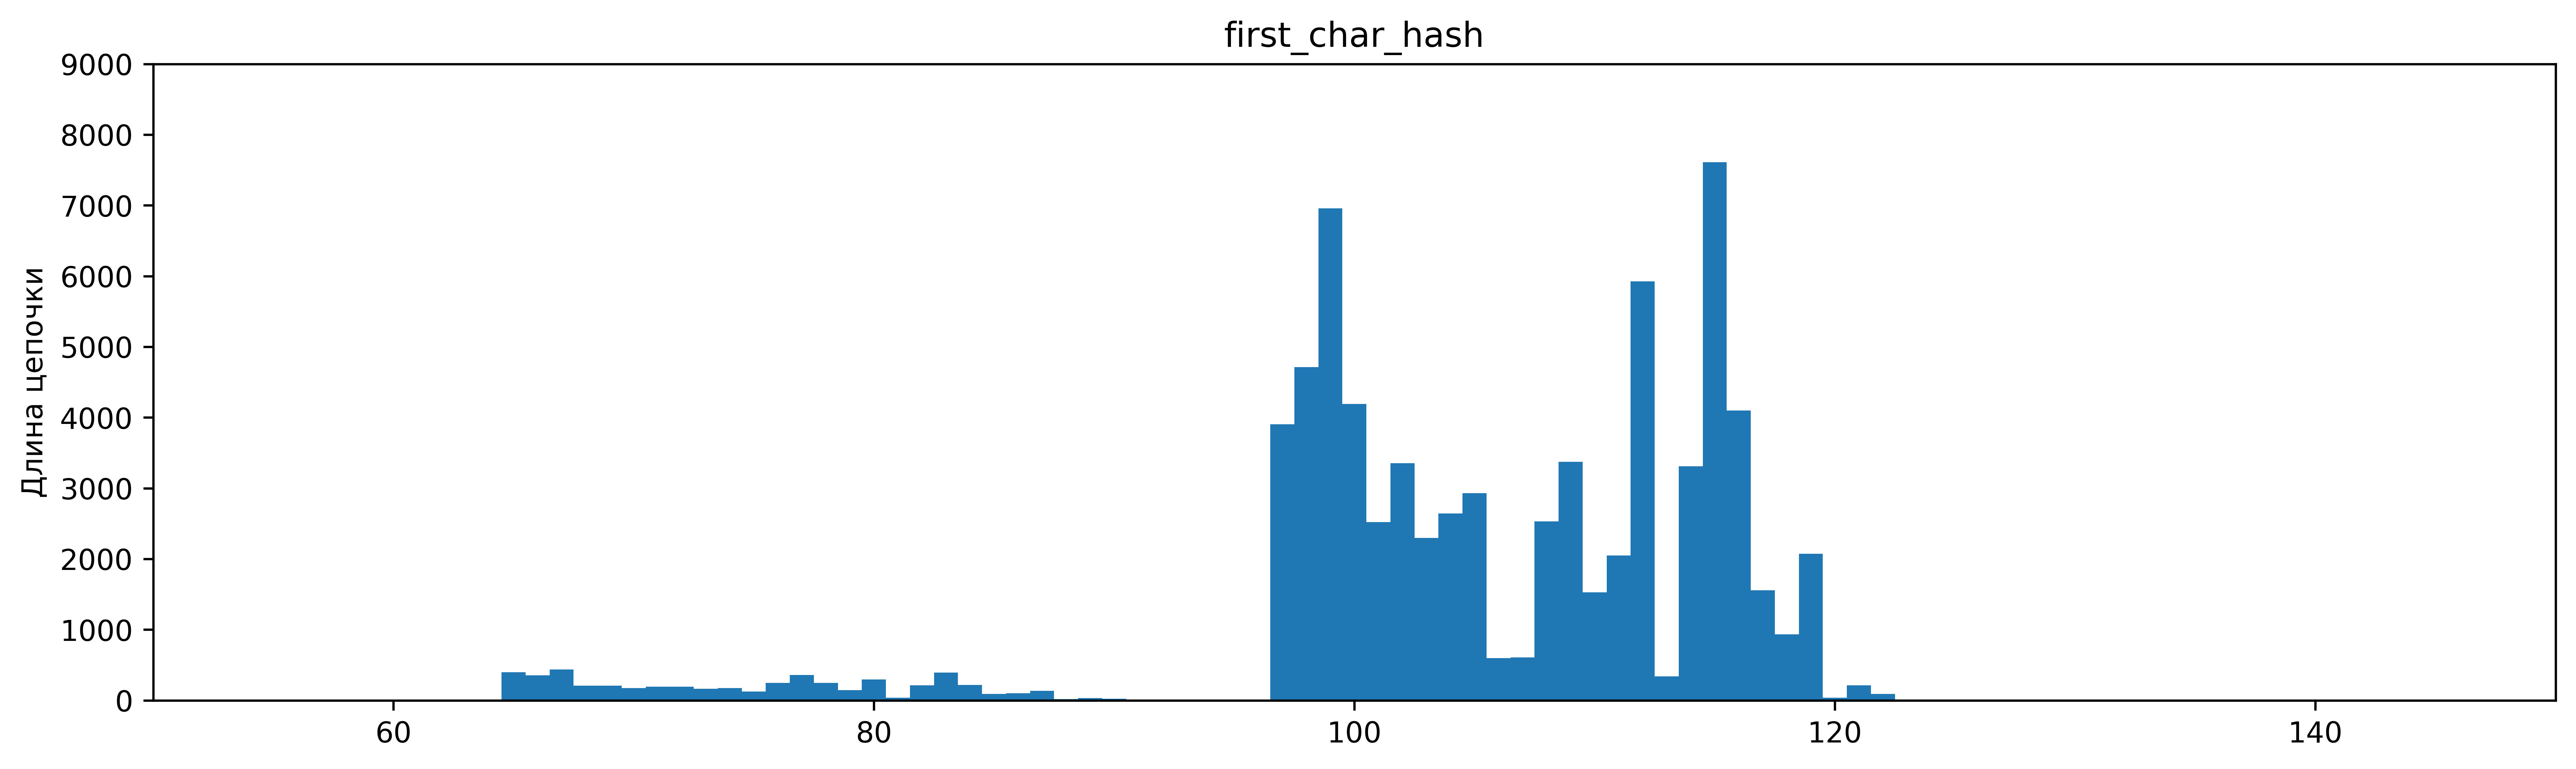

In [4]:
def plot_firstchar():
    name = "first_char_hash"
    y_height = 9000
    
    file = open("reports/{}.json".format(name), "r")
    data = json.loads(file.read())
    
    plt.figure(figsize=FIGSIZE, dpi=DPI)
    plt.title(name)
    
    WIDTH=1
    
    plt.bar([i for i in range (data["n buckets"])], data["chain lengths"], width=WIDTH)
    
    plt.xlim([50, 150])
    plt.ylim([0, y_height])
    plt.ylabel("Длина цепочки")
    
    plt.savefig("images/{}_detailed.png".format(name))
    
plot_firstchar()

In [3]:
import numpy as np
import json

hash_functions = ["const_hash", "crc32_hash", "first_char_hash", "gnu_hash", "rol_hash", "ror_hash", "strlen_hash", "sum_hash"]

for func in hash_functions:
    file = open("reports/{}.json".format(func), "r")
    data = json.loads(file.read())
    
    print(func, np.std(data["chain lengths"]))

const_hash 866.3341435959092
crc32_hash 3.5972009581673015
first_char_hash 197.29841771697335
gnu_hash 3.594532220574432
rol_hash 5.1427048875893675
ror_hash 8.09553735807464
strlen_hash 223.8788744476486
sum_hash 23.26079834631231


In [11]:
import numpy as np
import json

hash_functions = ["crc32_hash", "gnu_hash", "rol_hash", "ror_hash", "crc32_intrin_hash"]

for func in hash_functions:
    file = open("reports/{}_time.json".format(func), "r")
    data = json.loads(file.read())
    
    print(func, data["avg_time"] / 1000000, np.std(data["elapsed_times"]) / 1000000)

crc32_hash 65.264795 0.11869745813618589
gnu_hash 8.465548 0.03553846418321843
rol_hash 7.894758 0.1040632649182967
ror_hash 8.045439 0.34848024787360615
crc32_intrin_hash 0.942058 0.025284639053344226


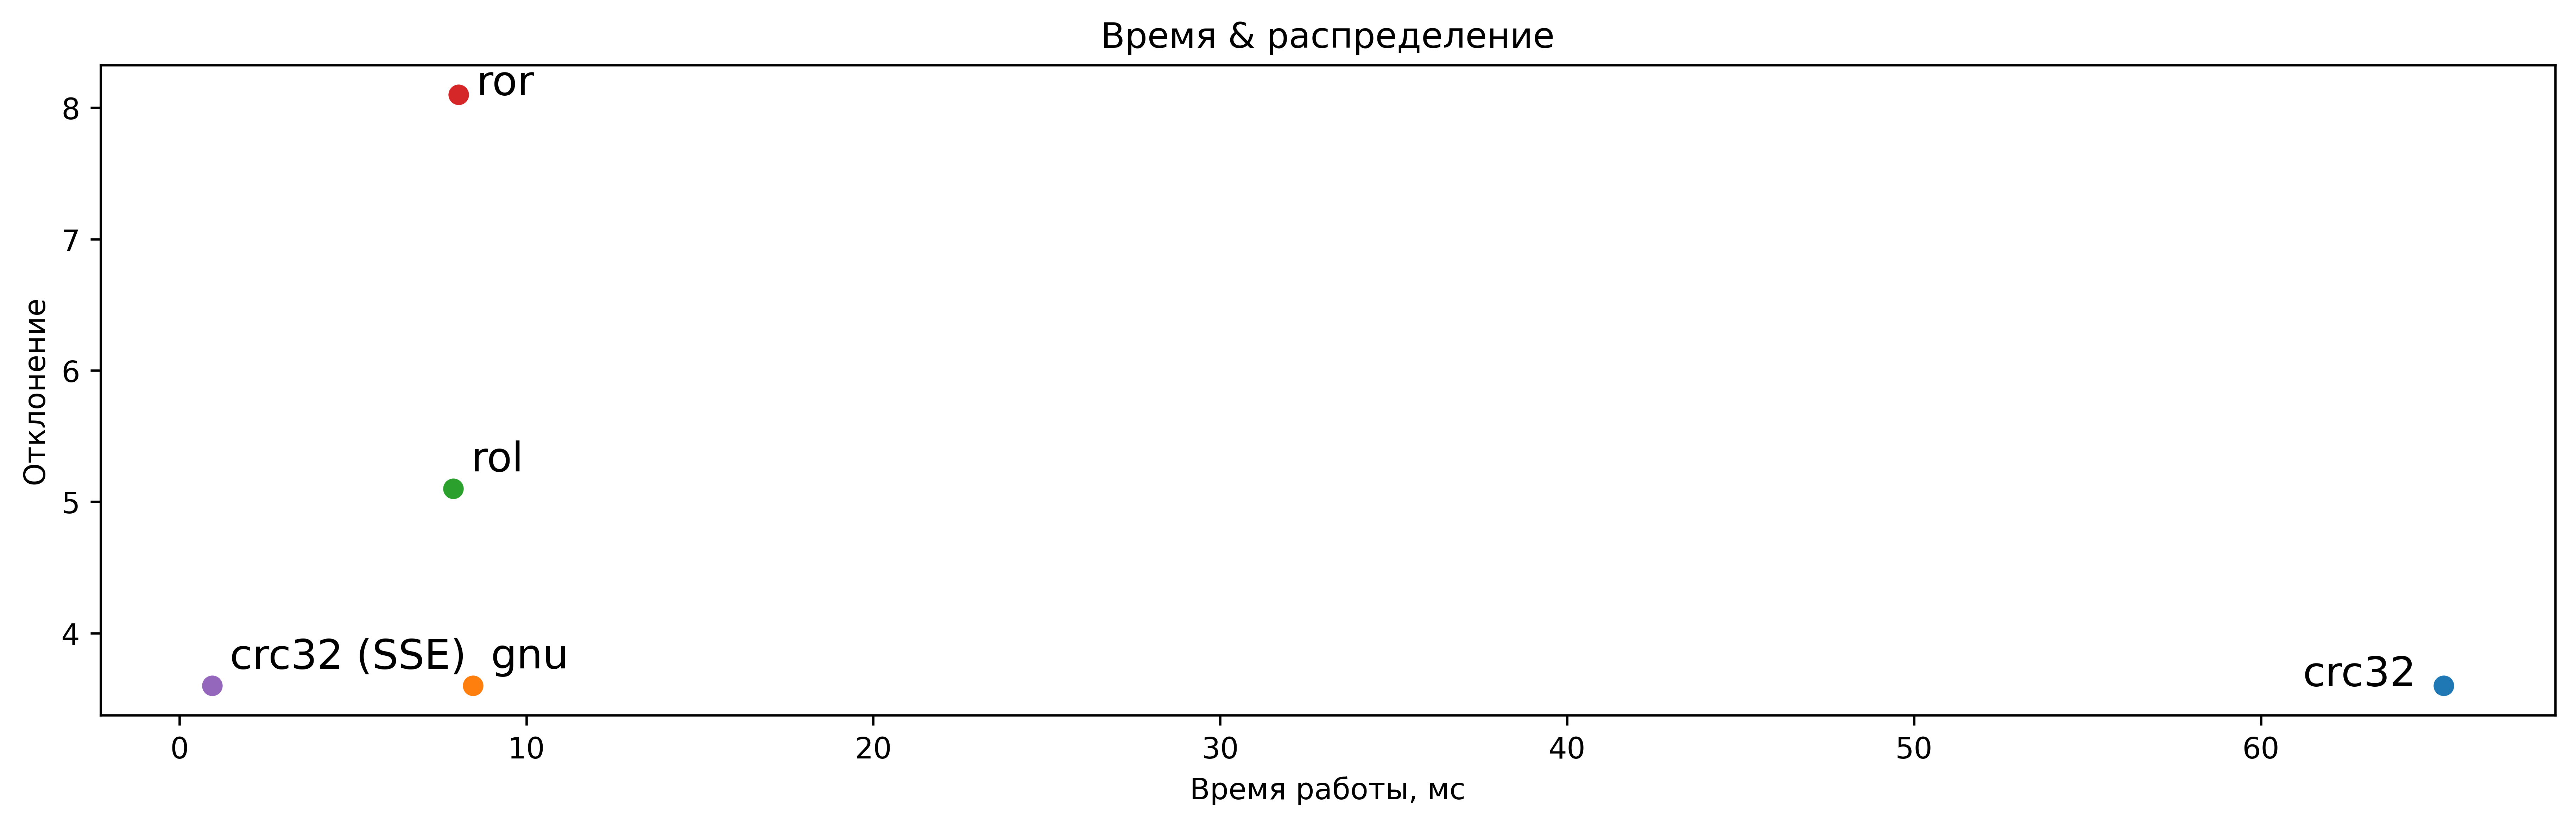

In [21]:
hashes = ["crc32", "gnu", "rol", "ror", "crc32 (SSE)"]
x = [65.264795, 8.465548, 7.894758, 8.045439, 0.942058]
y = [3.6, 3.6, 5.1, 8.1, 3.6]

plt.figure(figsize=FIGSIZE, dpi=DPI)
plt.title("Время & распределение")

for i in range(len(hashes)):
    plt.scatter([x[i]], [y[i]])
    
    if (i != 3 and i != 0):
        plt.annotate(hashes[i], (x[i], y[i]), xytext=(50, 50), size=14, textcoords="offset pixels")
    elif (i == 3):
        plt.annotate(hashes[i], (x[i], y[i]), xytext=(50, 0), size=14, textcoords="offset pixels")
    else:
        plt.annotate(hashes[i], (x[i], y[i]), xytext=(-400, 0), size=14, textcoords="offset pixels")
        
        
    
plt.ylabel("Отклонение")
plt.xlabel("Время работы, мс")

plt.savefig("images/time_disturb.png")

In [3]:
import json
import numpy as np
VERSION_NUM = 6

for i in range(VERSION_NUM):
    file = open("reports/v{}.json".format(i+1), "r")
    data = json.loads(file.read())
    
    print("v{}: {} ± {}".format(i+1, data["avg_time"]/1000000, np.std(data["elapsed_times"])/1000000))
    

v1: 13.777222 ± 0.21657807786494204
v2: 10.720589 ± 0.11659935687810419
v3: 7.979484 ± 0.2666627186384338
v4: 6.158381 ± 0.1567350403536182
v5: 5.131525 ± 0.32341005162165076
v6: 2.024583 ± 0.0840280967114081
